# Loading the Dataset 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv('Crowd data for anomaly detection.csv')

In [3]:
df.head(5)

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


# Exploring Data 

In [4]:
## Summary Statistics 
df.describe()

,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,Severity_level
count,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24019.000000,24123.000000,24123.000000,24123.000000
mean,0.319789,19.989362,0.742941,90.314782,251.092277,2.510923,0.004203,2.337064,0.288977,0.509265
std,0.067545,1.205473,0.279331,4.803848,167.615884,1.676159,0.032528,1.456331,0.453297,0.857201
min,-1.205900,11.162700,0.124400,84.324100,1.000000,0.010000,-1.031300,1.000000,0.000000,0.000000
25%,0.264500,19.575700,0.496700,88.475950,134.000000,1.340000,-0.001400,1.000000,0.000000,0.000000
50%,0.325400,20.288600,0.784300,89.170200,187.000000,1.870000,0.006300,2.000000,0.000000,0.000000
75%,0.356800,20.692900,1.005900,89.798100,336.000000,3.360000,0.013900,3.000000,1.000000,1.000000
max,1.966700,23.771700,1.567800,138.162100,990.000000,9.900000,0.455500,5.000000,1.000000,3.000000


In [5]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         24123 non-null  object 
 1   X                 24123 non-null  float64
 2   Y                 24123 non-null  float64
 3   Speed             24123 non-null  float64
 4   Heading           24123 non-null  float64
 5   AgentCount        24123 non-null  int64  
 6   Density           24123 non-null  float64
 7   Acc               24019 non-null  float64
 8   LevelOfCrowdness  24123 non-null  int64  
 9   label             24123 non-null  int64  
 10  label2            24123 non-null  object 
 11  Severity_level    24123 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 2.2+ MB


## Data Cleaning 

In [6]:
df.isnull().sum()

timestamp             0
X                     0
Y                     0
Speed                 0
Heading               0
AgentCount            0
Density               0
Acc                 104
LevelOfCrowdness      0
label                 0
label2                0
Severity_level        0
dtype: int64

Handling Missing Values 

In [7]:
df['Acc'].fillna(df['Acc'].mean(), inplace=True)

# Convert timestamp to datetime

In [8]:

df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S')

In [9]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
# Verify the data after cleaning
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         24123 non-null  datetime64[ns]
 1   X                 24123 non-null  float64       
 2   Y                 24123 non-null  float64       
 3   Speed             24123 non-null  float64       
 4   Heading           24123 non-null  float64       
 5   AgentCount        24123 non-null  int64         
 6   Density           24123 non-null  float64       
 7   Acc               24123 non-null  float64       
 8   LevelOfCrowdness  24123 non-null  int64         
 9   label             24123 non-null  int64         
 10  label2            24123 non-null  object        
 11  Severity_level    24123 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(4), object(1)
memory usage: 2.2+ MB
None


In [11]:
#df = df.apply(pd.to_numeric, errors='coerce')

In [12]:
df.head(5)

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,1900-01-01 00:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,1900-01-01 00:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,1900-01-01 00:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,1900-01-01 00:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,1900-01-01 00:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


In [13]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Ensure all data is numeric and handle non-numeric columns if any
# Convert data to numeric and handle non-numeric columns by dropping or encoding
data_numeric = df.select_dtypes(include=[float, int])  # Select only numeric columns

# Standardize the data
standardized_data = pd.DataFrame(scaler.fit_transform(data_numeric), columns=data_numeric.columns)

# Display the first few rows of the standardized dataset
print(standardized_data.head())


          X         Y     Speed   Heading  AgentCount   Density       Acc  \
0  1.520675 -0.723185  1.432952 -0.248261   -1.014795 -1.014795 -0.212691   
1  0.749318 -0.395174  1.448705 -0.149296   -1.002863 -1.002863 -0.212691   
2  1.186075 -0.130874  1.445125 -0.171591   -0.984965 -0.984965 -0.286634   
3  0.872202  0.040846  1.464815 -0.229505   -0.973032 -0.973032 -0.157233   
4  1.233452  0.392500  1.456939 -0.221219   -0.973032 -0.973032 -0.166476   

   LevelOfCrowdness     label  Severity_level  
0         -0.918124 -0.637515       -0.594115  
1         -0.918124 -0.637515       -0.594115  
2         -0.918124 -0.637515       -0.594115  
3         -0.918124 -0.637515       -0.594115  
4         -0.918124 -0.637515       -0.594115  


## Exploratory Data Analysis

Distribution of Numerical Features 

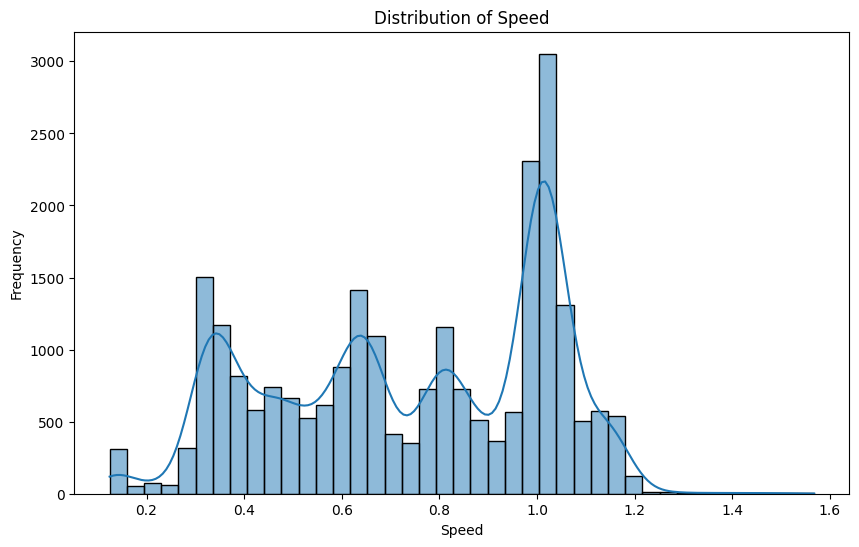

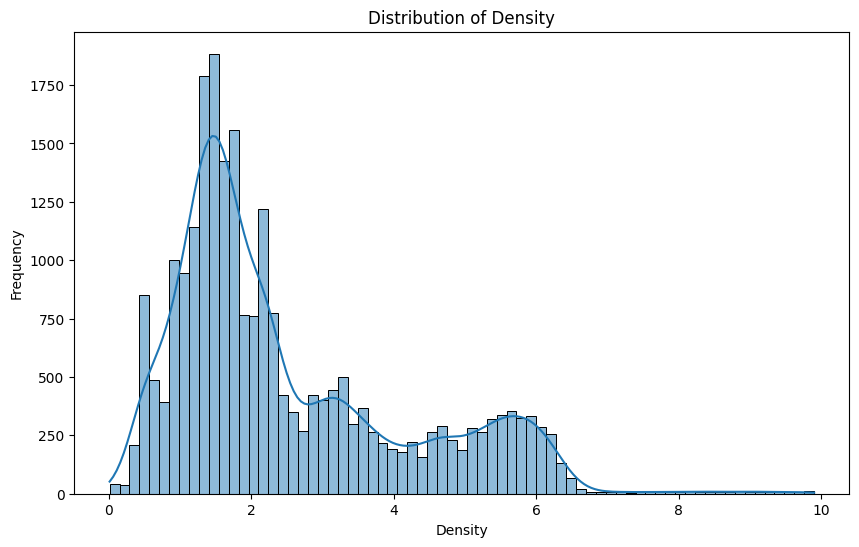

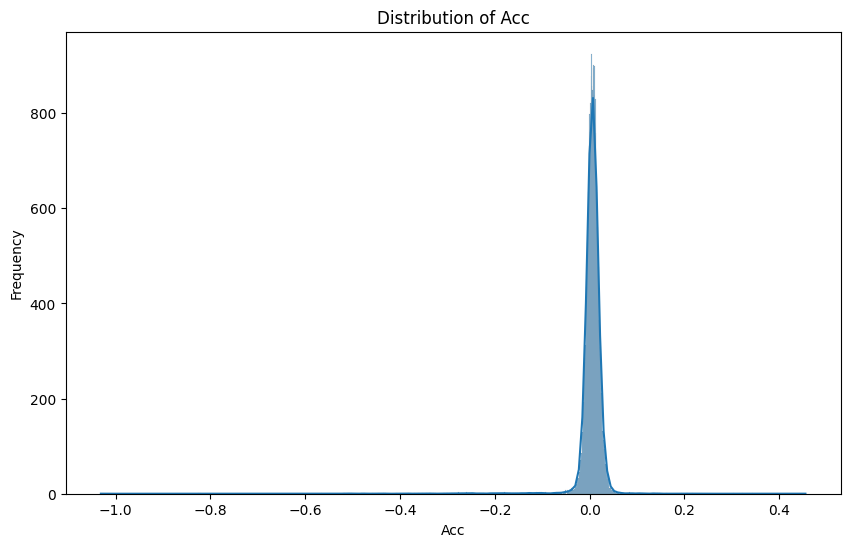

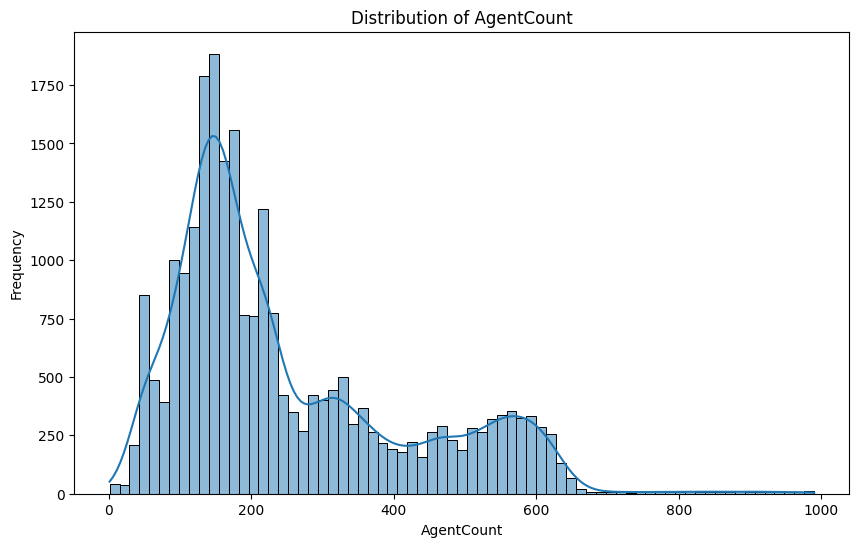

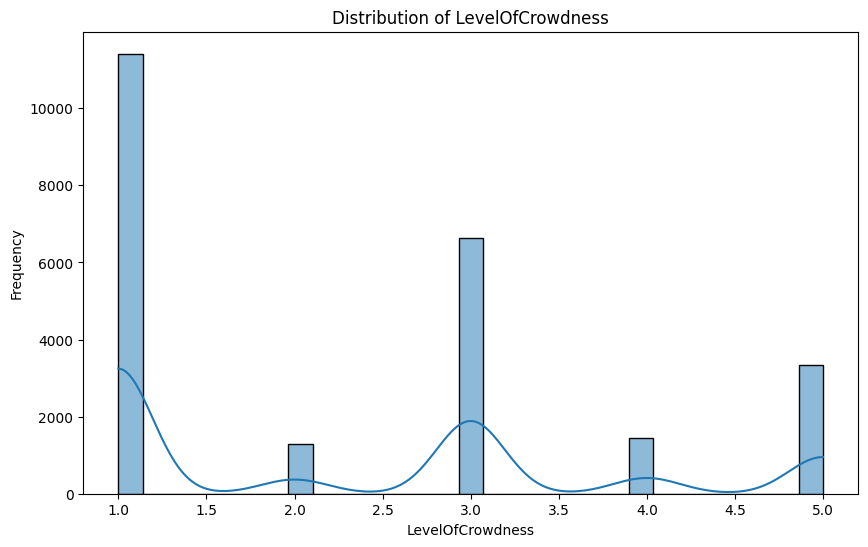

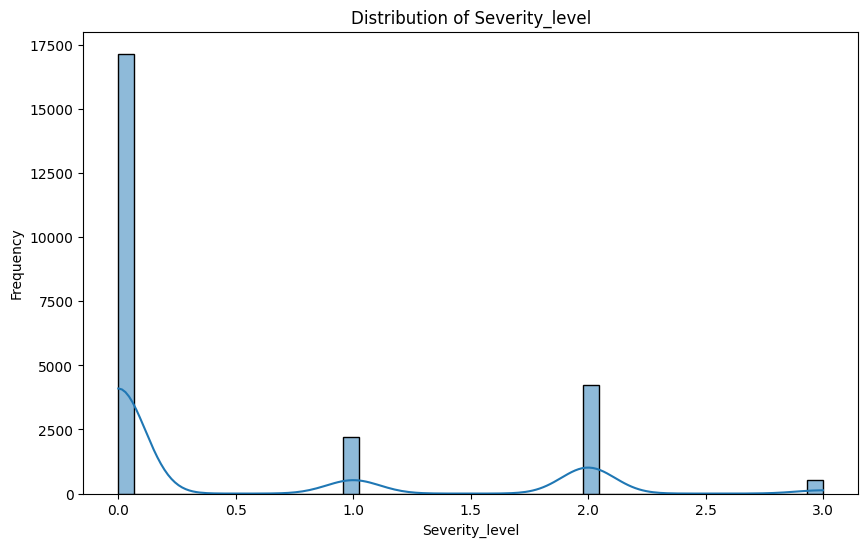

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#  histogram for numerical features
numerical_features = ['Speed', 'Density', 'Acc', 'AgentCount', 'LevelOfCrowdness', 'Severity_level']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


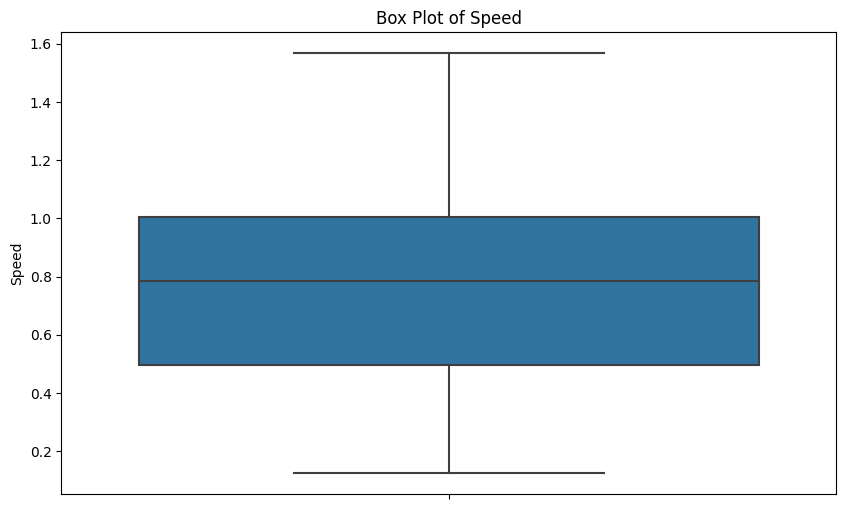

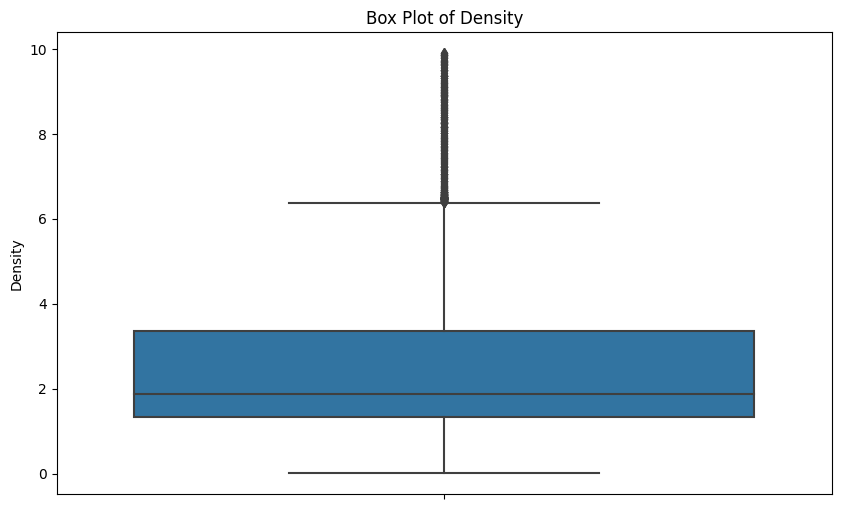

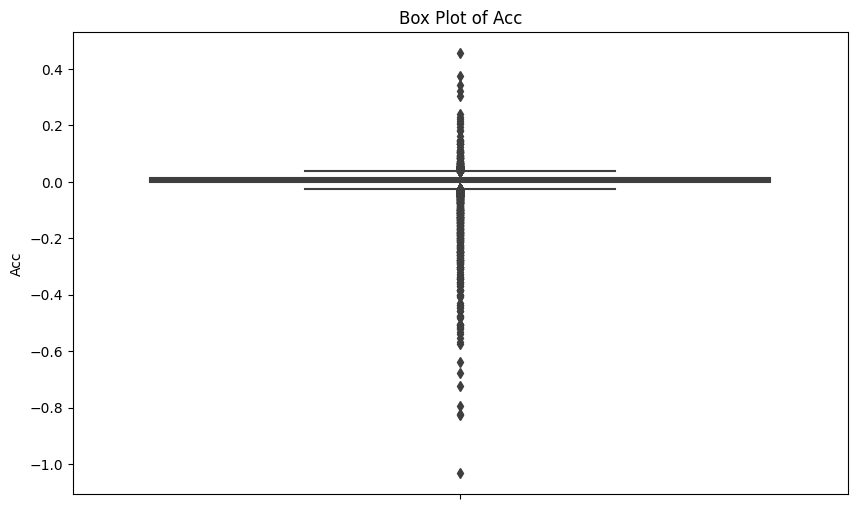

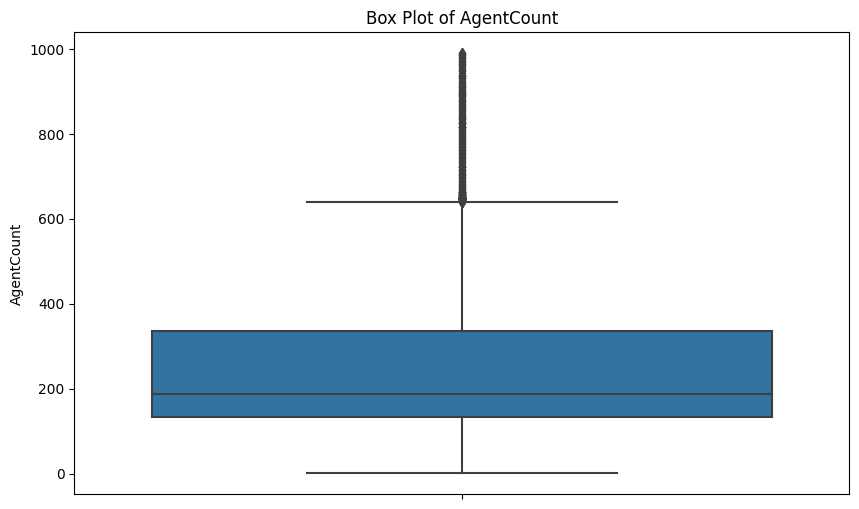

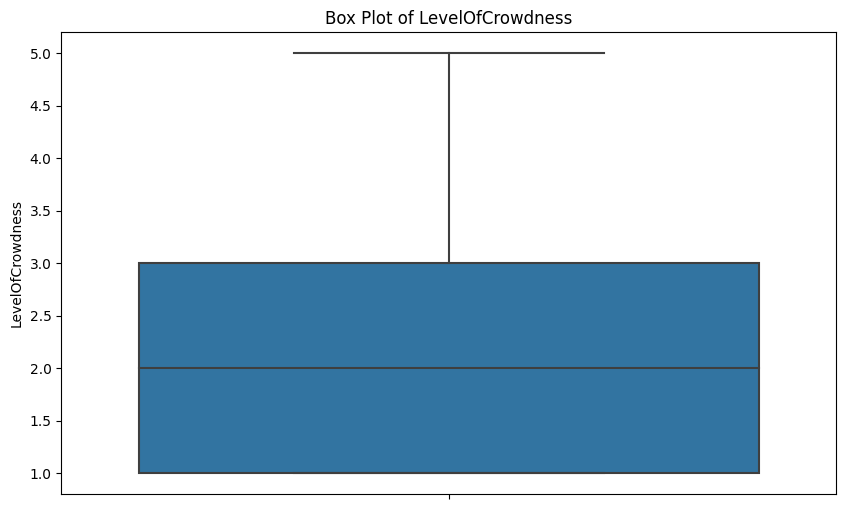

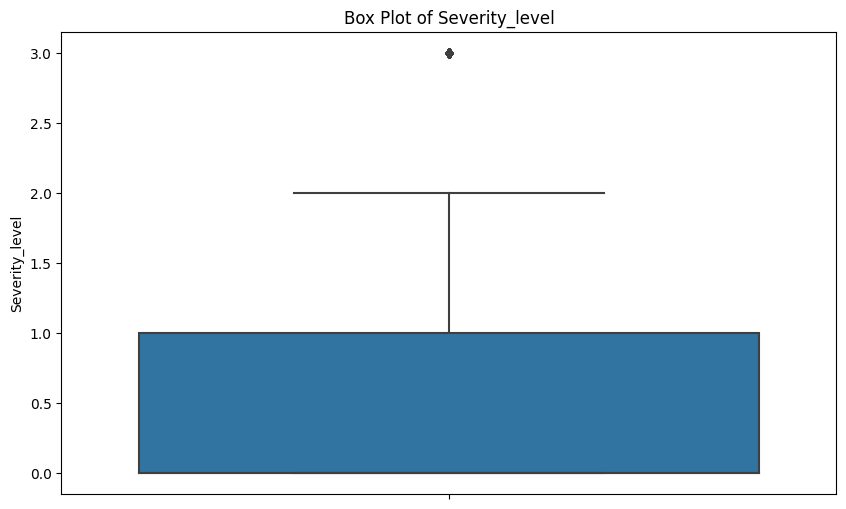

In [15]:
#  box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


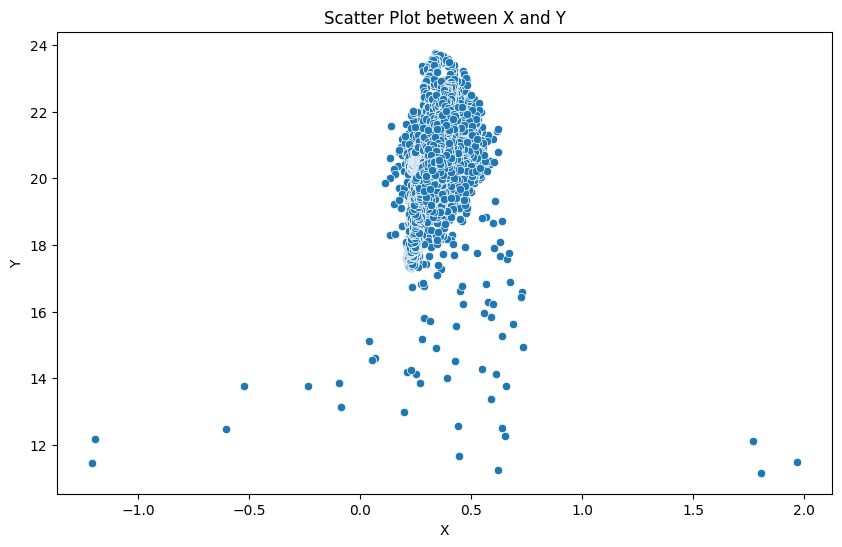

In [16]:
# Scatter plot between 'X' and 'Y'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=df)
plt.title('Scatter Plot between X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


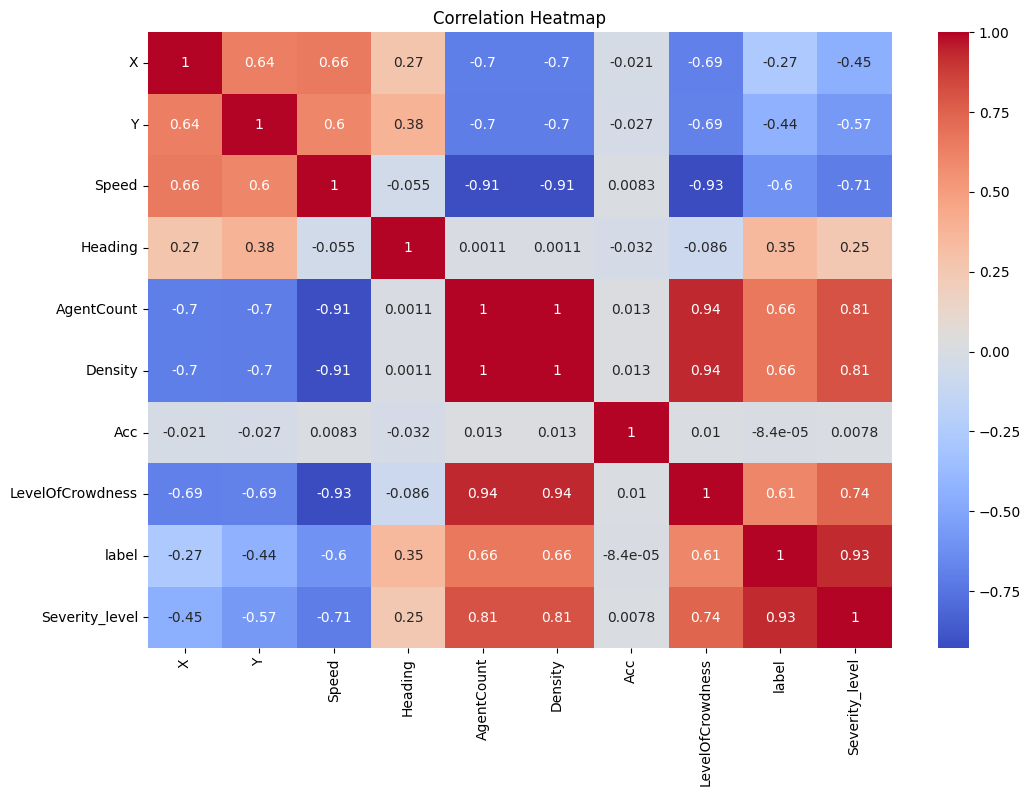

In [17]:
#  heatmap of correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


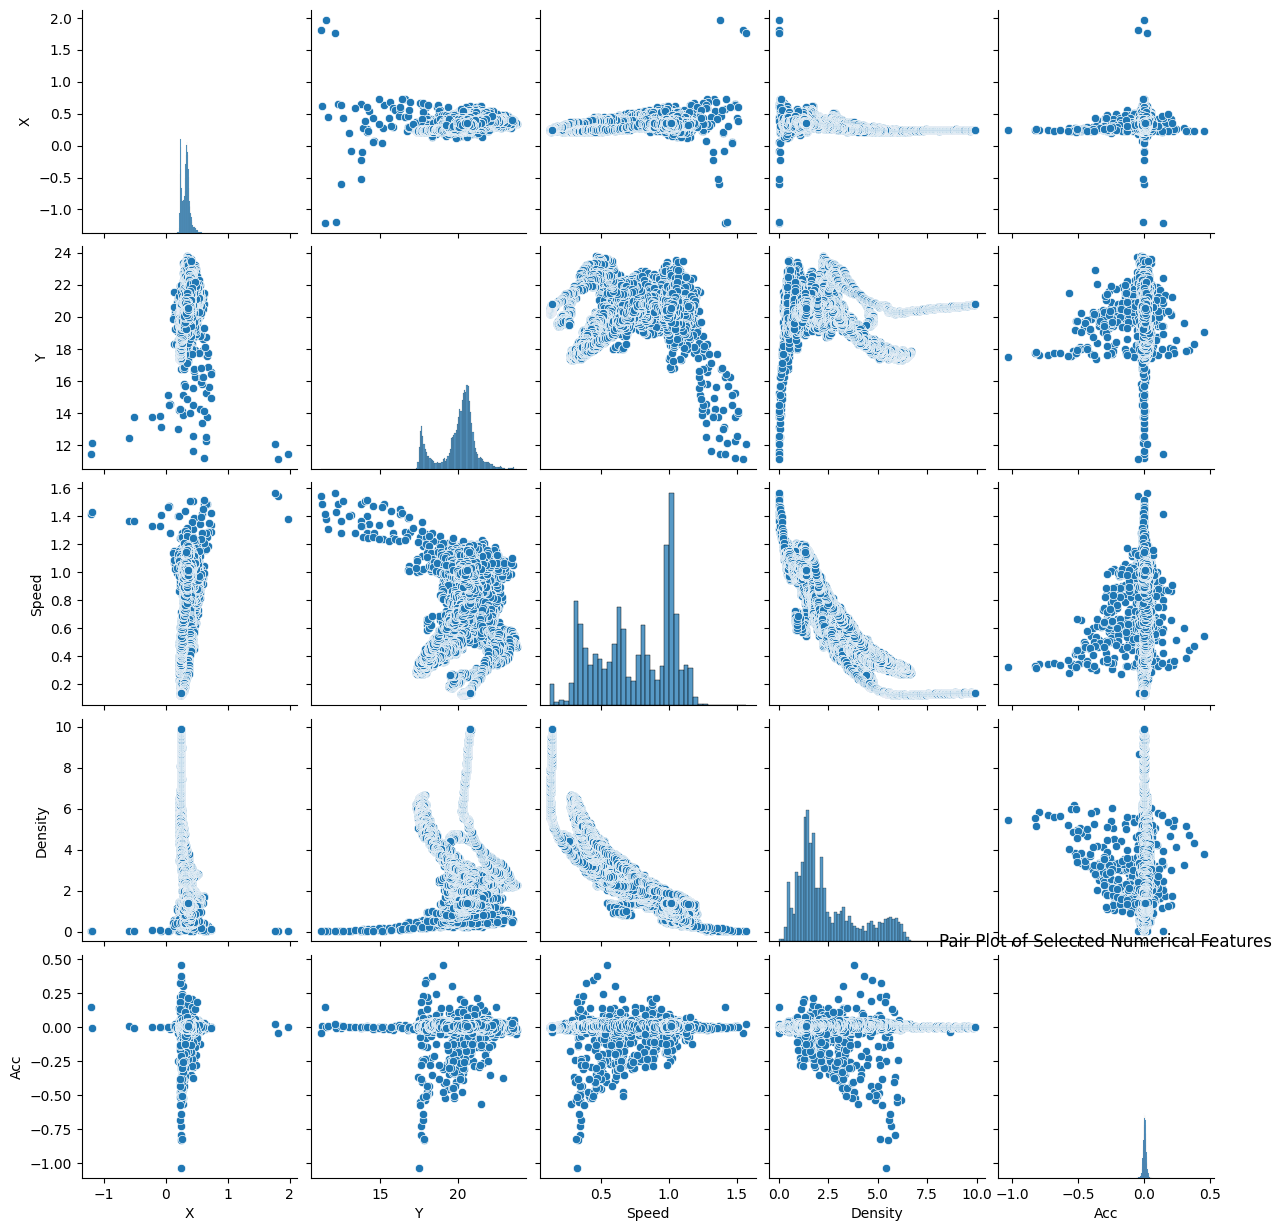

In [18]:
# Pair plot for selected numerical features
sns.pairplot(df[['X', 'Y', 'Speed', 'Density', 'Acc']])
plt.title('Pair Plot of Selected Numerical Features')
plt.show()



# Insights:
Distribution of Features:
Histograms show that 'Speed' has a right-skewed distribution.
'Density' and 'AgentCount' have a more uniform distribution.

Outliers:
Box plots reveal outliers in 'Speed', 'Density', and 'Acc'.


Relationships:
Scatter plot of 'X' and 'Y' suggests possible clustering or spatial patterns.


Correlation:
Heatmap shows a strong positive correlation between 'AgentCount' and 'Density'.
Negative correlation between 'LevelOfCrowdness' and 'Speed'.


Multivariate Analysis:
Pair plots highlight interactions, with 'Density' and 'AgentCount' showing a clear linear relationship.


In [19]:
df.head(5)

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,1900-01-01 00:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,1900-01-01 00:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,1900-01-01 00:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,1900-01-01 00:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,1900-01-01 00:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


In [20]:
# Correlation Analysis
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                         X         Y     Speed   Heading  AgentCount  \
X                 1.000000  0.635939  0.658514  0.274861   -0.696405   
Y                 0.635939  1.000000  0.602989  0.382209   -0.703409   
Speed             0.658514  0.602989  1.000000 -0.054522   -0.914923   
Heading           0.274861  0.382209 -0.054522  1.000000    0.001107   
AgentCount       -0.696405 -0.703409 -0.914923  0.001107    1.000000   
Density          -0.696405 -0.703409 -0.914923  0.001107    1.000000   
Acc              -0.020906 -0.026881  0.008276 -0.031561    0.012882   
LevelOfCrowdness -0.689679 -0.686265 -0.929420 -0.086456    0.935304   
label            -0.272881 -0.435047 -0.600682  0.350811    0.664367   
Severity_level   -0.452958 -0.570184 -0.705815  0.253543    0.807239   

                   Density       Acc  LevelOfCrowdness     label  \
X                -0.696405 -0.020906         -0.689679 -0.272881   
Y                -0.703409 -0.026881         -0.686265 -0.435047   
Spe

In [21]:
correlation_matrix = standardized_data.corr()

correlation_threshold = 0.8

high_corr_features = correlation_matrix.index[correlation_matrix.abs().sum() > correlation_threshold]

# Print highly correlated features
print("Highly correlated features:")
print(high_corr_features)

filtered_data = standardized_data[high_corr_features]

print(filtered_data.head())


Highly correlated features:
Index(['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc',
       'LevelOfCrowdness', 'label', 'Severity_level'],
      dtype='object')
          X         Y     Speed   Heading  AgentCount   Density       Acc  \
0  1.520675 -0.723185  1.432952 -0.248261   -1.014795 -1.014795 -0.212691   
1  0.749318 -0.395174  1.448705 -0.149296   -1.002863 -1.002863 -0.212691   
2  1.186075 -0.130874  1.445125 -0.171591   -0.984965 -0.984965 -0.286634   
3  0.872202  0.040846  1.464815 -0.229505   -0.973032 -0.973032 -0.157233   
4  1.233452  0.392500  1.456939 -0.221219   -0.973032 -0.973032 -0.166476   

   LevelOfCrowdness     label  Severity_level  
0         -0.918124 -0.637515       -0.594115  
1         -0.918124 -0.637515       -0.594115  
2         -0.918124 -0.637515       -0.594115  
3         -0.918124 -0.637515       -0.594115  
4         -0.918124 -0.637515       -0.594115  


In [22]:

# Convert categorical columns to numerical if necessary (label encoding, one-hot encoding)
df['LevelOfCrowdness'] = df['LevelOfCrowdness'].astype('category').cat.codes

# Correlation Analysis
correlation_matrix = df.corr(numeric_only=True)
high_corr_threshold = 0.9
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)
print("Highly correlated features (correlation > 0.9):", high_corr_features)
data_reduced = df.drop(columns=high_corr_features)

# Select only numeric columns for variance analysis
numeric_cols = data_reduced.select_dtypes(include=[np.number]).columns

# Variance Analysis
low_variance_threshold = 0.01
low_variance_features = [column for column in numeric_cols if data_reduced[column].var() < low_variance_threshold]
print("Low variance features (variance < 0.01):", low_variance_features)
data_reduced = data_reduced.drop(columns=low_variance_features)

# Check the remaining features
print(data_reduced.columns)

Highly correlated features (correlation > 0.9): {'Severity_level', 'AgentCount', 'LevelOfCrowdness', 'Density'}
Low variance features (variance < 0.01): ['X', 'Acc']
Index(['timestamp', 'Y', 'Speed', 'Heading', 'label', 'label2'], dtype='object')


In [23]:
df.head()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,1900-01-01 00:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,0,0,normal,0
1,1900-01-01 00:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,0,0,normal,0
2,1900-01-01 00:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,0,0,normal,0
3,1900-01-01 00:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,0,0,normal,0
4,1900-01-01 00:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,0,0,normal,0


## Outlier detection 

Z SCORE 

Total outliers detected in X using Z-Score: 128
Total outliers detected in Y using Z-Score: 50
Total outliers detected in Speed using Z-Score: 0
Total outliers detected in Heading using Z-Score: 510
Total outliers detected in AgentCount using Z-Score: 140
Total outliers detected in Density using Z-Score: 140
Total outliers detected in Acc using Z-Score: 254
Total outliers detected in LevelOfCrowdness using Z-Score: 0
Total outliers detected in label using Z-Score: 0
Total outliers detected in Severity_level using Z-Score: 0


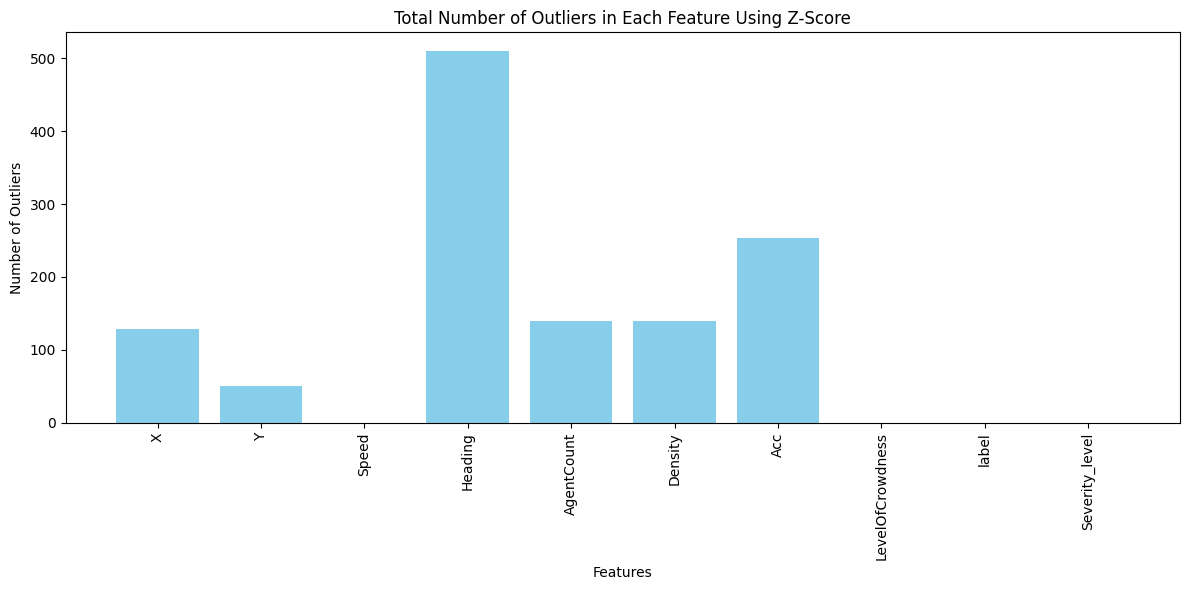

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

# Z-Score for outlier detection
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    return df[(z_scores > threshold) | (z_scores < -threshold)]

# Detecting outliers for each feature using Z-Score and counting them
outlier_counts = {}
for column in standardized_data.columns:
    outliers = detect_outliers_zscore(standardized_data, column)
    outlier_counts[column] = len(outliers)
    print(f"Total outliers detected in {column} using Z-Score: {outlier_counts[column]}")

# Plotting the total number of outliers in each column
plt.figure(figsize=(12, 6))
plt.bar(outlier_counts.keys(), outlier_counts.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Number of Outliers')
plt.title('Total Number of Outliers in Each Feature Using Z-Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


IQR 

Total outliers detected in X using IQR: 280
Total outliers detected in Y using IQR: 3004
Total outliers detected in Speed using IQR: 0
Total outliers detected in Heading using IQR: 3461
Total outliers detected in AgentCount using IQR: 284
Total outliers detected in Density using IQR: 284
Total outliers detected in Acc using IQR: 857
Total outliers detected in LevelOfCrowdness using IQR: 0
Total outliers detected in label using IQR: 0
Total outliers detected in Severity_level using IQR: 534


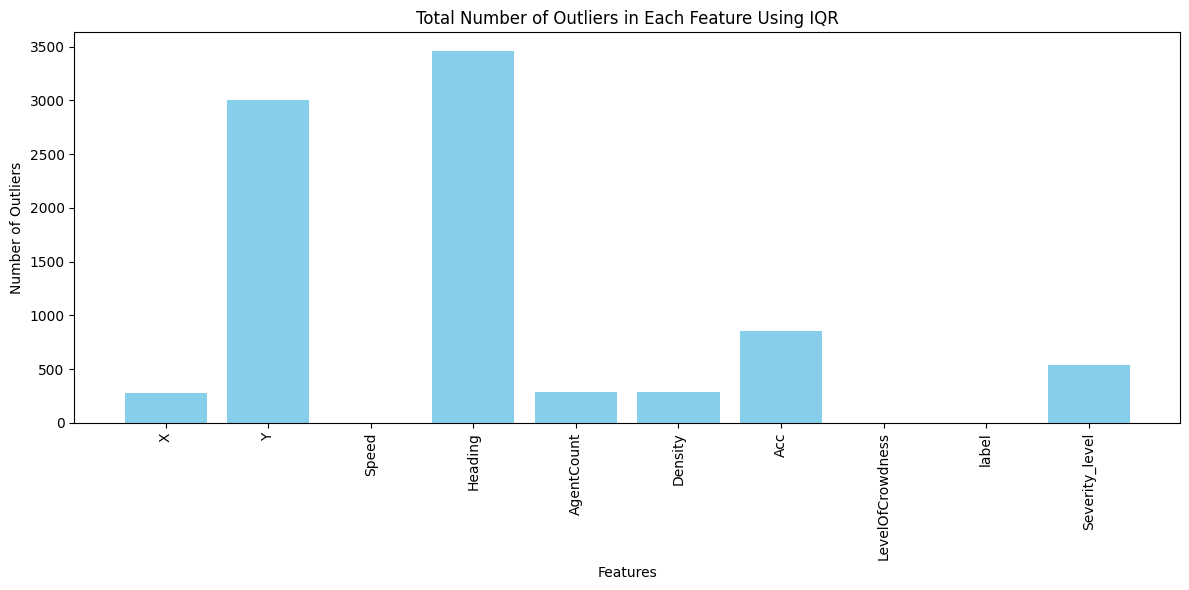

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'standardized_data' is already defined and contains the standardized data

# Interquartile Range (IQR) for outlier detection
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detecting outliers for each feature using IQR and counting them
outlier_counts_iqr = {}
for column in standardized_data.columns:
    outliers = detect_outliers_iqr(standardized_data, column)
    outlier_counts_iqr[column] = len(outliers)
    print(f"Total outliers detected in {column} using IQR: {outlier_counts_iqr[column]}")

# Plotting the total number of outliers in each column
plt.figure(figsize=(12, 6))
plt.bar(outlier_counts_iqr.keys(), outlier_counts_iqr.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Number of Outliers')
plt.title('Total Number of Outliers in Each Feature Using IQR')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


ISOLATION FOREST ANOMALY CAL 

c:\Users\palla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Anomaly detection using Isolation Forest:
anomaly_iso
 1    21710
-1     2413
Name: count, dtype: int64


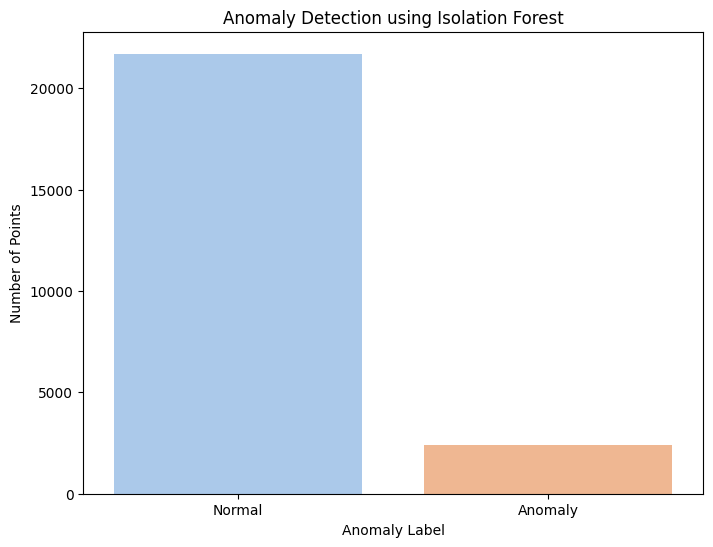

In [26]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['anomaly_iso'] = iso_forest.fit_predict(df.select_dtypes(include=['float64', 'int64']))

# -1 for anomalies, 1 for normal points
print("\nAnomaly detection using Isolation Forest:")
print(df['anomaly_iso'].value_counts())

# Visualizing the total number of anomalies detected
anomaly_counts = df['anomaly_iso'].value_counts()

anomaly_labels = anomaly_counts.index.map({-1: 'Anomaly', 1: 'Normal'})

plt.figure(figsize=(8, 6))
sns.barplot(x=anomaly_labels, y=anomaly_counts.values, palette='pastel')
plt.xlabel('Anomaly Label')
plt.ylabel('Number of Points')
plt.title('Anomaly Detection using Isolation Forest')

plt.show()


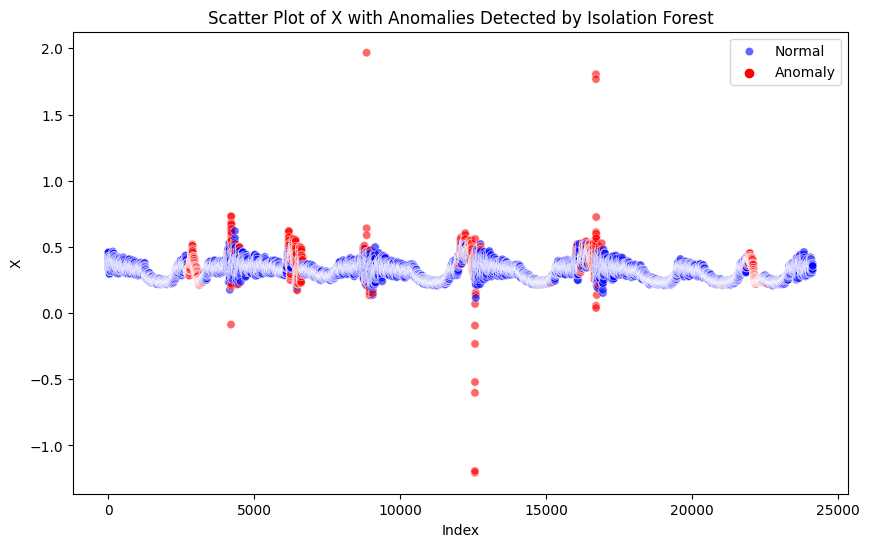

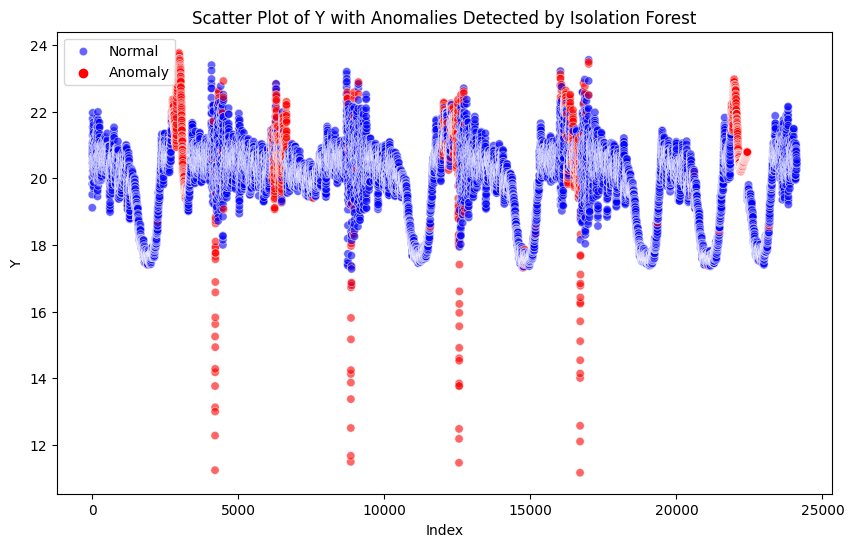

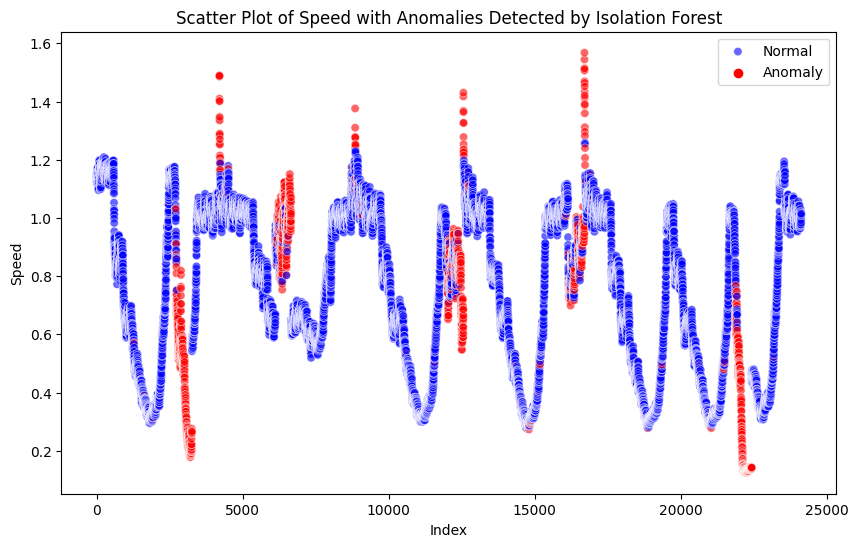

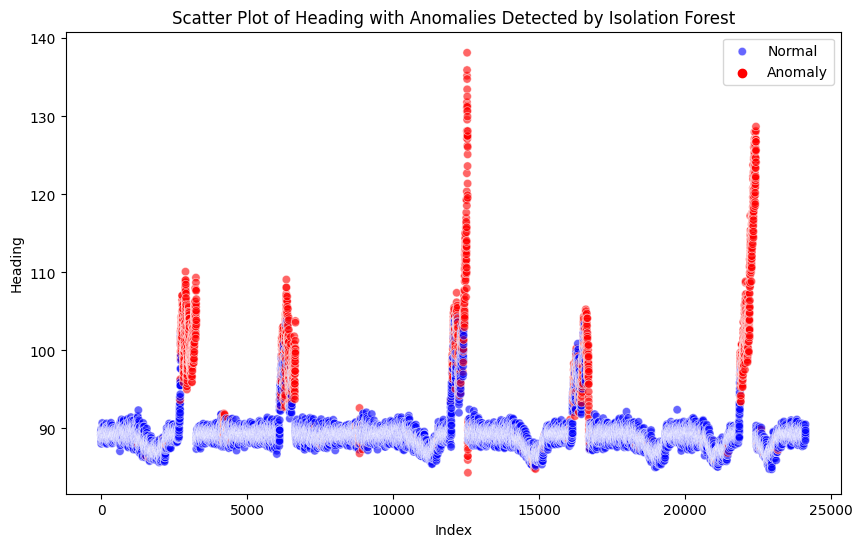

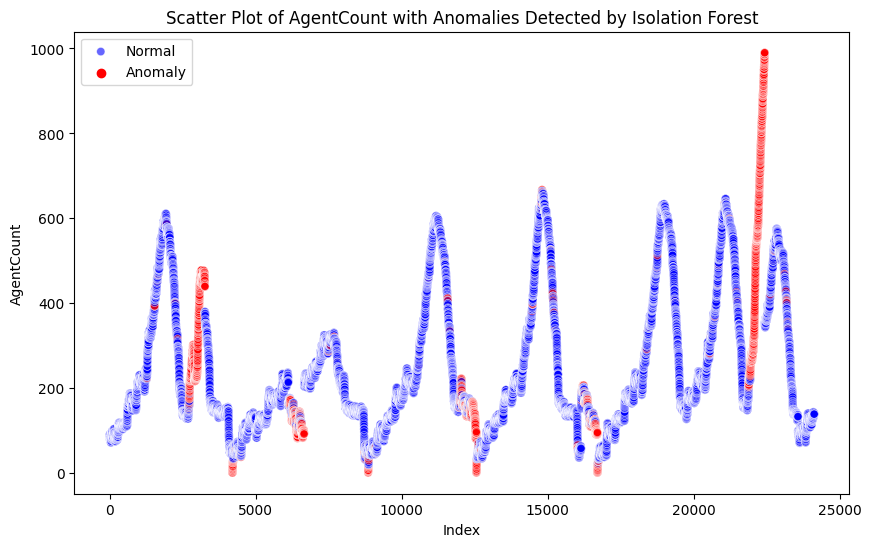

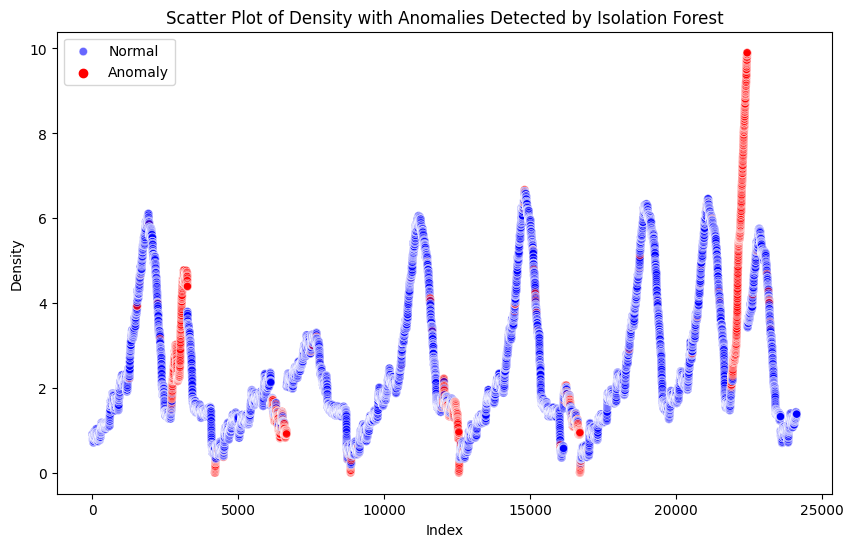

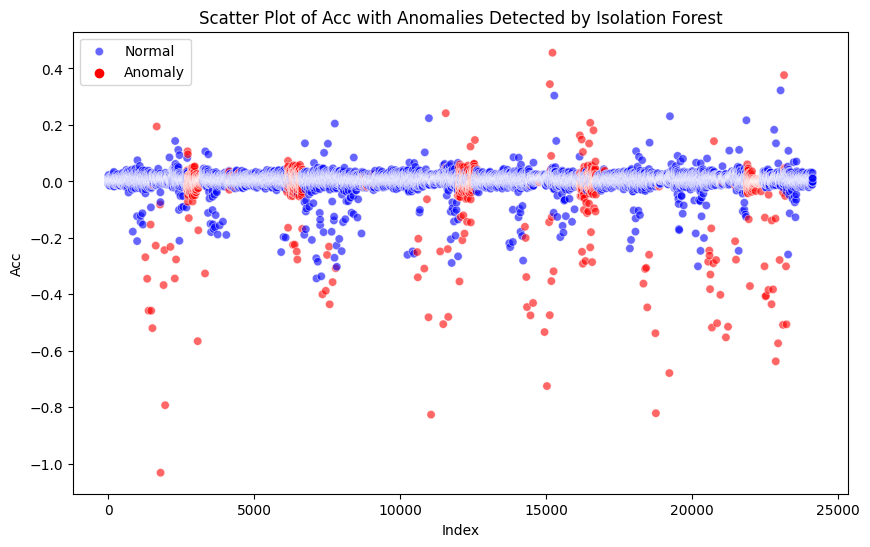

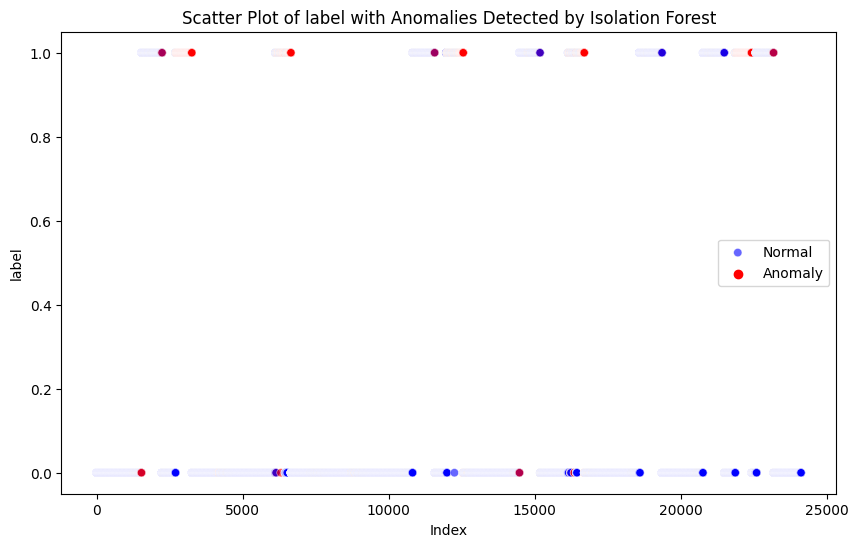

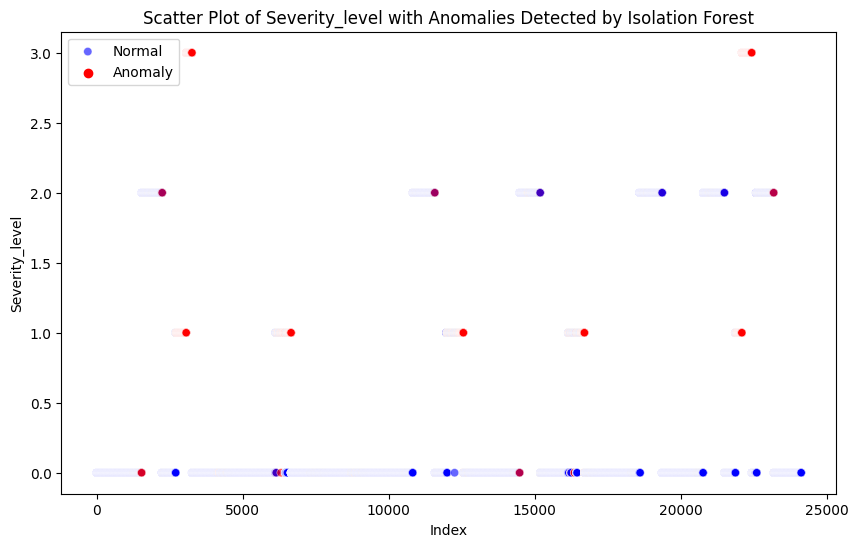

In [27]:
# Plot scatter plots for each column with hue as the anomaly_iso
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df.index, y=df[col], hue=df['anomaly_iso'], palette={1: 'blue', -1: 'red'}, alpha=0.6)
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter Plot of {col} with Anomalies Detected by Isolation Forest')
    plt.legend(labels=['Normal', 'Anomaly'])
    plt.show()

In [28]:
df.head()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level,anomaly_iso
0,1900-01-01 00:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,0,0,normal,0,1
1,1900-01-01 00:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,0,0,normal,0,1
2,1900-01-01 00:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,0,0,normal,0,1
3,1900-01-01 00:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,0,0,normal,0,1
4,1900-01-01 00:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,0,0,normal,0,1


In [29]:
# Standardize the data
scaler = StandardScaler()
data_numeric = df.select_dtypes(include=[float, int])  # Select only numeric columns
standardized_data = pd.DataFrame(scaler.fit_transform(data_numeric), columns=data_numeric.columns)

# Bin the target column
if df['label'].dtype == 'float' or df['label'].dtype == 'int':
    df['label'] = pd.cut(df['label'], bins=2, labels=[0, 1]) 

## KNN MODEL 

K-Nearest Neighbors Model
Accuracy: 0.9989637305699481
Precision: 0.9993108201240524
Recall: 0.9972489683631361
F1 Score: 0.9982788296041308
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3371
           1       1.00      1.00      1.00      1454

    accuracy                           1.00      4825
   macro avg       1.00      1.00      1.00      4825
weighted avg       1.00      1.00      1.00      4825

[[3370    1]
 [   4 1450]]


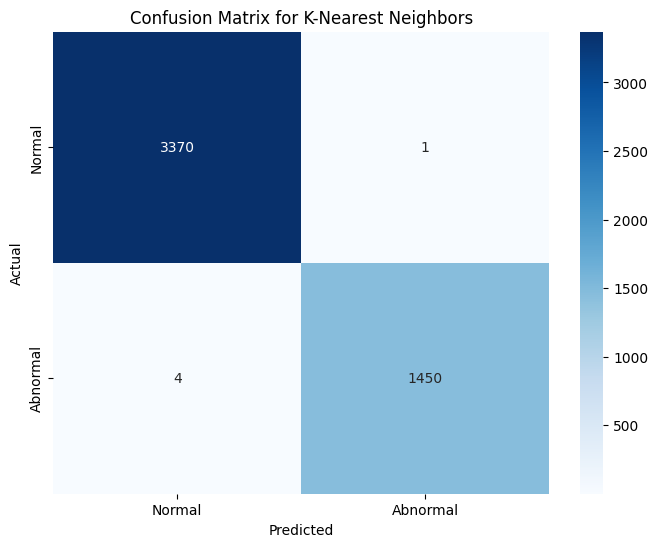

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X = standardized_data[['Heading', 'Density']]
y = df['label']

# Bin the target variable if it is continuous
if y.dtype == 'float' or y.dtype == 'int':
    y_binned = pd.cut(y, bins=2, labels=[0, 1])  # Bin into two categories: normal (0) and anomaly (1)
else:
    y_binned = y

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("K-Nearest Neighbors Model")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)

# Plotting the confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot the confusion matrix for KNN
plot_confusion_matrix(cm_knn, "K-Nearest Neighbors")


In [44]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn, X, y_binned, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.99917098 0.99875648 0.99875648 0.99771973 0.99689055]
Mean CV Accuracy: 0.9982588439495098


## ISOLATION FOREST MODEL 

c:\Users\palla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Accuracy: 0.9243523316062177
Precision: 0.8533419857235561
Recall: 0.9044016506189821
F1-Score: 0.8781302170283807
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      3371
           1       0.85      0.90      0.88      1454

    accuracy                           0.92      4825
   macro avg       0.91      0.92      0.91      4825
weighted avg       0.93      0.92      0.92      4825

[[3145  226]
 [ 139 1315]]


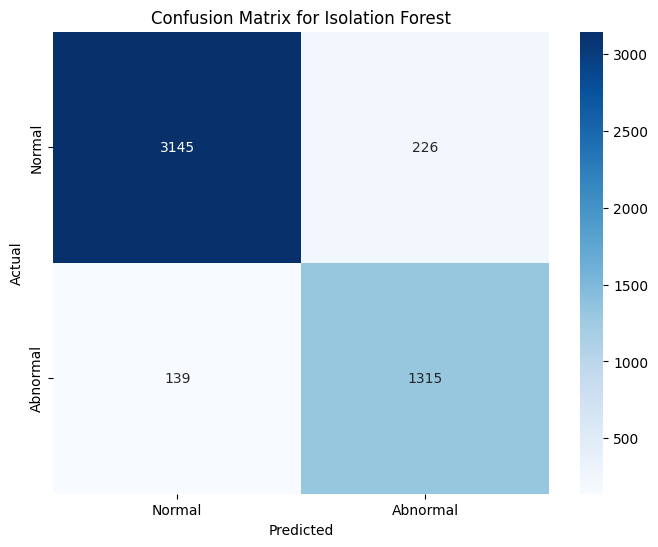

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are already defined
# Replace with actual data

# Train Isolation Forest model
iso_forest = IsolationForest(contamination=0.3, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies
y_pred_train = iso_forest.predict(X_train)
y_pred_test = iso_forest.predict(X_test)

# Convert predictions from {1, -1} to {0, 1}
y_pred_train = np.where(y_pred_train == -1, 1, 0)
y_pred_test = np.where(y_pred_test == -1, 1, 0)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print evaluation metrics
print("Accuracy:", accuracy)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Visualization of Anomaly Scores
anomaly_scores = iso_forest.decision_function(X_test)

# Classification report
print(classification_report(y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

# Plotting the confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot the confusion matrix for Isolation Forest
plot_confusion_matrix(cm, "Isolation Forest")


In [46]:

X_normalized = (X - X.mean()) / X.std()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For One-Class SVM, use only the normal class for training (assuming 0 is normal and 1 is anomaly)
X_train_normal = X_train[y_train == 0] if y is not None else X_train


## SVM 

One-Class SVM Test Set Evaluation
Accuracy: 0.6531
Precision: 0.4648
Recall: 1.0000
F1-Score: 0.6347
ROC-AUC: 0.7517
Precision-Recall AUC: 0.7324
              precision    recall  f1-score   support

           0       1.00      0.50      0.67      3371
           1       0.46      1.00      0.63      1454

    accuracy                           0.65      4825
   macro avg       0.73      0.75      0.65      4825
weighted avg       0.84      0.65      0.66      4825

[[1697 1674]
 [   0 1454]]


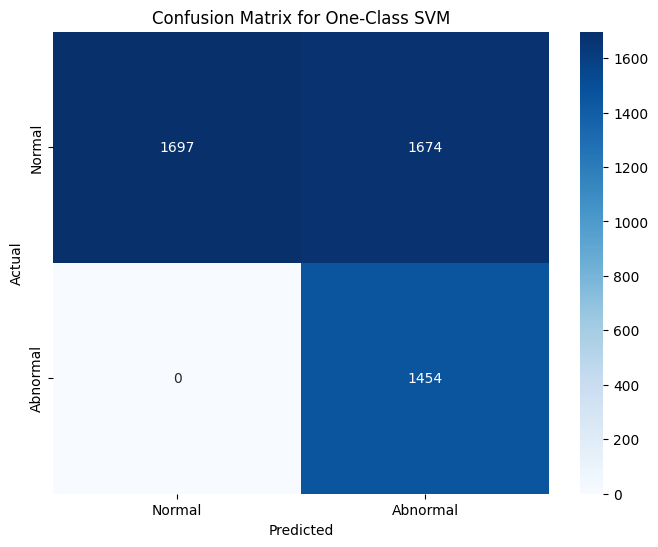

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, precision_recall_curve, auc, classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are already defined
# Replace with actual data

# Train the One-Class SVM model
oc_svm = OneClassSVM(kernel='rbf', gamma='auto')
oc_svm.fit(X_train_normal)

# Predict anomalies
y_pred_train = oc_svm.predict(X_train)
y_pred_test = oc_svm.predict(X_test)

# Map the predictions: -1 (anomaly) -> 1, 1 (normal) -> 0
y_pred_train = np.where(y_pred_train == -1, 1, 0)
y_pred_test = np.where(y_pred_test == -1, 1, 0)

# Evaluate the model
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_test, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_test)

# Precision-Recall AUC
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_test)
pr_auc = auc(recall_curve, precision_curve)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)

# Print evaluation metrics
print("One-Class SVM Test Set Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Classification report
print(classification_report(y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

# Plotting the confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot the confusion matrix for One-Class SVM
plot_confusion_matrix(cm, "One-Class SVM")


## Decision Tree 

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Model
Accuracy: 0.9995854922279793
Precision: 1.0
Recall: 0.9986244841815681
F1 Score: 0.9993117687543015
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3371
           1       1.00      1.00      1.00      1454

    accuracy                           1.00      4825
   macro avg       1.00      1.00      1.00      4825
weighted avg       1.00      1.00      1.00      4825

[[3371    0]
 [   2 1452]]
ROC-AUC (Decision Tree): 0.9993122420907841
Precision-Recall AUC (Decision Tree): 0.9995194959767945


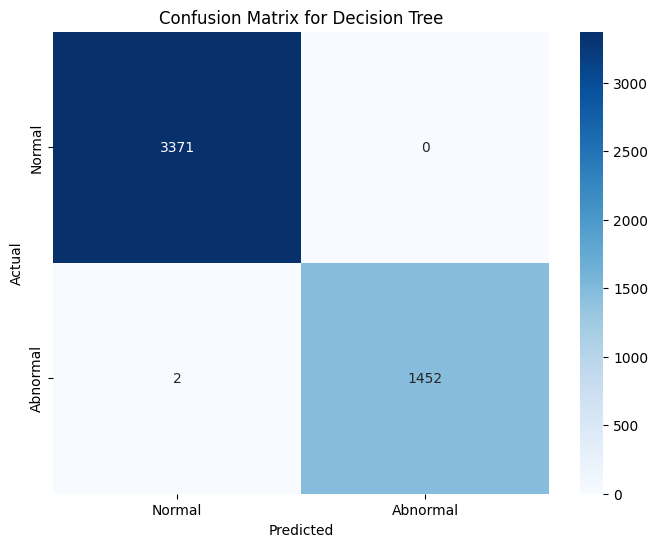

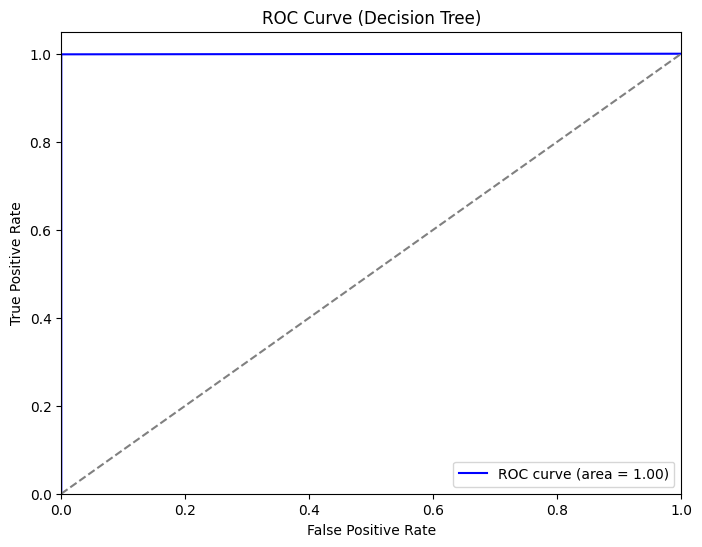

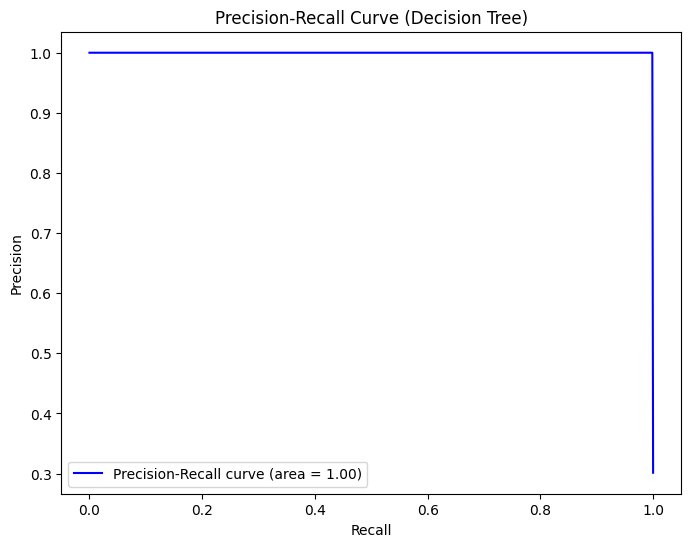

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve

# Assuming X_train, X_test, y_train, y_test are already defined
# Replace with actual data

# Hyperparameter tuning for Decision Tree
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

# Best parameters for Decision Tree
print("Best parameters for Decision Tree:", dt_grid.best_params_)

# Evaluate Decision Tree model
dt_best = dt_grid.best_estimator_
y_pred_dt = dt_best.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Model")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

# ROC-AUC for Decision Tree
y_proba_dt = dt_best.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_proba_dt)
auc_score_dt = auc(fpr_dt, tpr_dt)

print("ROC-AUC (Decision Tree):", roc_auc_dt)

# Precision-Recall AUC for Decision Tree
precision_curve_dt, recall_curve_dt, _dt = precision_recall_curve(y_test, y_proba_dt)
pr_auc_dt = auc(recall_curve_dt, precision_curve_dt)

print("Precision-Recall AUC (Decision Tree):", pr_auc_dt)

# Plotting the confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot the confusion matrix for Decision Tree
plot_confusion_matrix(cm_dt, "Decision Tree")

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'ROC curve (area = {auc_score_dt:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

# Plotting Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_curve_dt, precision_curve_dt, color='blue', label=f'Precision-Recall curve (area = {pr_auc_dt:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Decision Tree)')
plt.legend(loc="lower left")
plt.show()


DBSACN 


DBSCAN Model
Accuracy: 0.7019689119170984
Precision: 1.0
Recall: 0.011004126547455296
F1 Score: 0.0217687074829932
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      3371
           1       1.00      0.01      0.02      1454

    accuracy                           0.70      4825
   macro avg       0.85      0.51      0.42      4825
weighted avg       0.79      0.70      0.58      4825

[[3371    0]
 [1438   16]]
ROC-AUC (DBSCAN): 0.5055020632737276
Precision-Recall AUC (DBSCAN): 0.6545176073151784


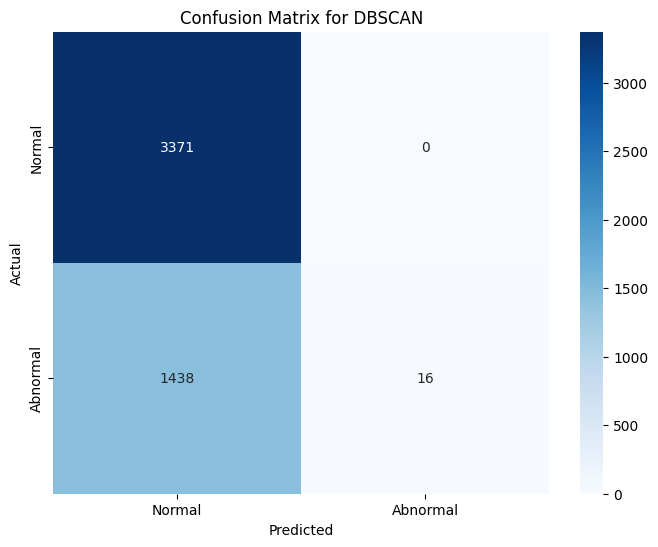

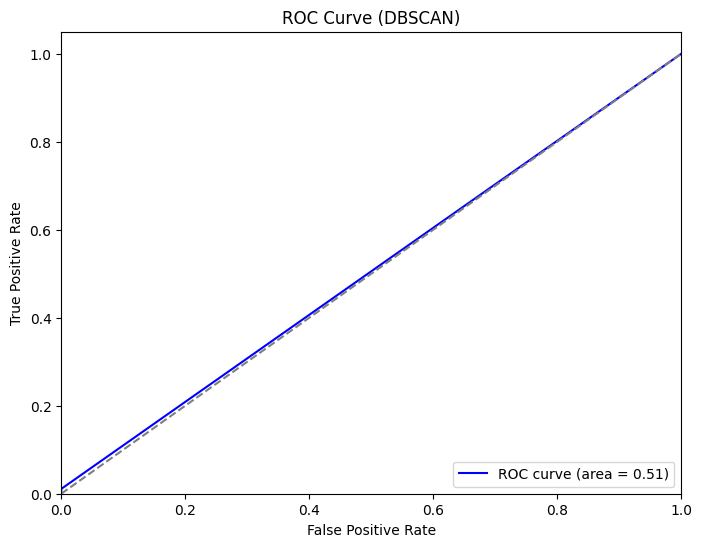

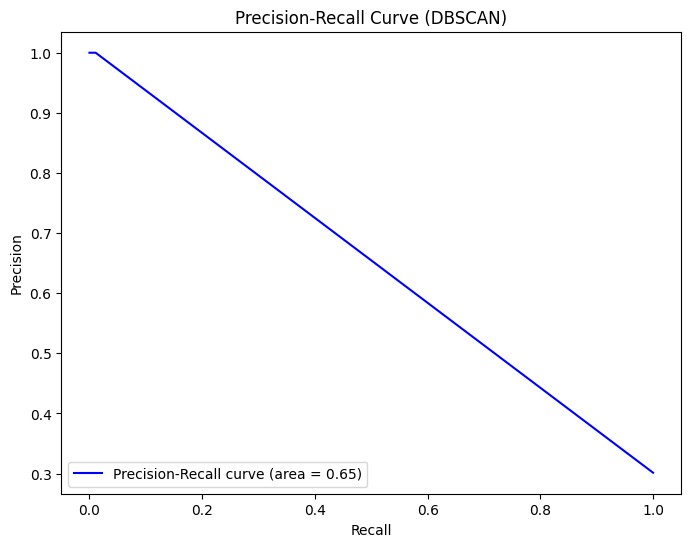

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve

# Assuming X_train, X_test, y_train, y_test are already defined
# Replace with actual data

# Fit DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_train)

# Predict the anomalies (outliers are labeled as -1 in DBSCAN)
y_pred_dbscan = dbscan.fit_predict(X_test)

# Transform DBSCAN output to align with the expected anomaly/normal labels
y_pred_dbscan = np.where(y_pred_dbscan == -1, 1, 0)  # Convert -1 to 1 (anomaly) and other labels to 0 (normal)

# Evaluate the DBSCAN model
accuracy_dbscan = accuracy_score(y_test, y_pred_dbscan)
precision_dbscan = precision_score(y_test, y_pred_dbscan)
recall_dbscan = recall_score(y_test, y_pred_dbscan)
f1_dbscan = f1_score(y_test, y_pred_dbscan)

print("\nDBSCAN Model")
print("Accuracy:", accuracy_dbscan)
print("Precision:", precision_dbscan)
print("Recall:", recall_dbscan)
print("F1 Score:", f1_dbscan)
print(classification_report(y_test, y_pred_dbscan))

# Confusion matrix
cm_dbscan = confusion_matrix(y_test, y_pred_dbscan)
print(cm_dbscan)

# ROC-AUC for DBSCAN
roc_auc_dbscan = roc_auc_score(y_test, y_pred_dbscan)
fpr_dbscan, tpr_dbscan, thresholds_dbscan = roc_curve(y_test, y_pred_dbscan)
auc_score_dbscan = auc(fpr_dbscan, tpr_dbscan)

print("ROC-AUC (DBSCAN):", roc_auc_dbscan)

# Precision-Recall AUC for DBSCAN
precision_curve_dbscan, recall_curve_dbscan, _dbscan = precision_recall_curve(y_test, y_pred_dbscan)
pr_auc_dbscan = auc(recall_curve_dbscan, precision_curve_dbscan)

print("Precision-Recall AUC (DBSCAN):", pr_auc_dbscan)

# Plotting the confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot the confusion matrix for DBSCAN
plot_confusion_matrix(cm_dbscan, "DBSCAN")

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dbscan, tpr_dbscan, color='blue', label=f'ROC curve (area = {auc_score_dbscan:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (DBSCAN)')
plt.legend(loc="lower right")
plt.show()

# Plotting Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_curve_dbscan, precision_curve_dbscan, color='blue', label=f'Precision-Recall curve (area = {pr_auc_dbscan:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (DBSCAN)')
plt.legend(loc="lower left")
plt.show()


## Anomaly simulation 


In [37]:
import pandas as pd
import numpy as np

# Create a dummy dataset
np.random.seed(42)
n_samples = 1000
n_features = 5

dummy_data = pd.DataFrame(np.random.randn(n_samples, n_features), columns=[f'feature_{i}' for i in range(n_features)])
dummy_data['target'] = np.random.randint(0, 2, size=n_samples)  # Binary target variable

print(dummy_data.head())


   feature_0  feature_1  feature_2  feature_3  feature_4  target
0   0.496714  -0.138264   0.647689   1.523030  -0.234153       1
1  -0.234137   1.579213   0.767435  -0.469474   0.542560       0
2  -0.463418  -0.465730   0.241962  -1.913280  -1.724918       1
3  -0.562288  -1.012831   0.314247  -0.908024  -1.412304       1
4   1.465649  -0.225776   0.067528  -1.424748  -0.544383       1


In [38]:
# Simulate anomalies
num_anomalies = 50
random_anomalies = np.random.choice(dummy_data.index, num_anomalies, replace=False)
dummy_data.loc[random_anomalies, 'feature_0'] *= 1.5  # Injecting anomalies by changing 'feature_0' values

print(dummy_data.loc[random_anomalies].head())


     feature_0  feature_1  feature_2  feature_3  feature_4  target
561  -2.664370  -0.080600  -0.833056   0.915390  -0.549540       0
362  -0.724592   0.146793   1.612221   0.896839  -0.268531       1
796   2.043844   1.640615   3.152057  -1.123494   0.242882       1
70    0.466361   1.475356   0.857660  -0.159939  -0.019016       0
139  -0.464320   0.326133  -1.251114   0.924027  -0.184902       1


In [39]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier

# Train Isolation Forest
iso_forest = IsolationForest(random_state=42)
iso_forest.fit(dummy_data.drop(columns=['target']))

# Train LOF
lof = LocalOutlierFactor(n_neighbors=20, novelty=True)
lof.fit(dummy_data.drop(columns=['target']))

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(dummy_data.drop(columns=['target']), dummy_data['target'])


KNeighborsClassifier()

In [40]:
import pandas as pd
import numpy as np

# Load the original dataset to understand the structure and distributions
original_df = pd.read_csv("Crowd data for anomaly detection.csv")

# Generate dummy data with similar statistics
np.random.seed(42)
n_samples = len(original_df)

# Generate data with similar distributions
dummy_data = pd.DataFrame({
    'timestamp': pd.date_range(start='1/1/2024', periods=n_samples, freq='T'),
    'X': np.random.normal(loc=original_df['X'].mean(), scale=original_df['X'].std(), size=n_samples),
    'Y': np.random.normal(loc=original_df['Y'].mean(), scale=original_df['Y'].std(), size=n_samples),
    'Speed': np.random.normal(loc=original_df['Speed'].mean(), scale=original_df['Speed'].std(), size=n_samples),
    'Heading': np.random.normal(loc=original_df['Heading'].mean(), scale=original_df['Heading'].std(), size=n_samples),
    'AgentCount': np.random.randint(low=original_df['AgentCount'].min(), high=original_df['AgentCount'].max(), size=n_samples),
    'Density': np.random.normal(loc=original_df['Density'].mean(), scale=original_df['Density'].std(), size=n_samples),
    'Acc': np.random.normal(loc=original_df['Acc'].mean(), scale=original_df['Acc'].std(), size=n_samples),
    'LevelOfCrowdness': np.random.randint(low=original_df['LevelOfCrowdness'].min(), high=original_df['LevelOfCrowdness'].max(), size=n_samples),
    'label': np.random.choice(original_df['label'].unique(), size=n_samples),
    'label2': np.random.choice(original_df['label2'].unique(), size=n_samples),
    'Severity_level': np.random.choice(original_df['Severity_level'].unique(), size=n_samples)
})

print(dummy_data.head())


            timestamp         X          Y     Speed    Heading  AgentCount  \
0 2024-01-01 00:00:00  0.353339  19.767359  0.895711  87.823676         432   
1 2024-01-01 00:01:00  0.310450  21.615458  0.146021  87.865620         559   
2 2024-01-01 00:02:00  0.363537  19.687781  0.852525  94.539253         935   
3 2024-01-01 00:03:00  0.422661  19.273162  1.184917  89.026377         501   
4 2024-01-01 00:04:00  0.303973  17.866862  0.623677  93.263297         582   

    Density       Acc  LevelOfCrowdness  label   label2  Severity_level  
0  1.106710 -0.015251                 2      1   normal               2  
1  0.057422  0.071523                 1      0  anomaly               1  
2  1.503466 -0.029273                 1      0  anomaly               1  
3  1.605850  0.052978                 4      1  anomaly               3  
4  3.872234  0.023145                 2      0   normal               1  


In [41]:
# Simulate anomalies by modifying 'Y' values
num_anomalies = 50
random_anomalies = np.random.choice(dummy_data.index, num_anomalies, replace=False)
dummy_data.loc[random_anomalies, 'Y'] *= 1.5  # Injecting anomalies by changing 'Y' values

print(dummy_data.loc[random_anomalies].head())


                timestamp         X          Y     Speed    Heading  \
14417 2024-01-11 00:17:00  0.396790  24.177486  0.729405  94.489922   
20876 2024-01-15 11:56:00  0.302437  28.081757  1.175863  86.380918   
18701 2024-01-13 23:41:00  0.408456  28.982458  0.869724  91.440943   
12338 2024-01-09 13:38:00  0.352834  28.690742  0.856638  87.845039   
23632 2024-01-17 09:52:00  0.365169  30.001811  0.265016  88.734065   

       AgentCount   Density       Acc  LevelOfCrowdness  label   label2  \
14417         403  0.588856  0.043210                 3      1  anomaly   
20876          27  3.800690  0.010800                 3      1  anomaly   
18701         927  3.822621 -0.004278                 3      0  anomaly   
12338         918  1.196018 -0.043811                 1      1   normal   
23632         106  3.924810 -0.009849                 3      1   normal   

       Severity_level  
14417               2  
20876               0  
18701               1  
12338               0  
23